# Introduction

Before data is directly fed to a machine learning model, it is important to understand the data.Data in its raw form is meaningless. Thats where EDA or Exploratory Data Analysis comes in. It is important to clean and preprocess the data so that we can draw inference from the data. In simple terms EDA help us visualising correlations and patterns among the dependent and independent variables. EDA is an important step before fitting the data to a predictive machine learning model be it regression problem or classification model.

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

### Importing the data

In [188]:
x = pd.read_csv('googleplaystore.csv');x

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [181]:
x.groupby('Type')['Category'].count()

Type
0           1
Free    10039
Paid      800
Name: Category, dtype: int64

### Dropping less important columns 

Lets drop some columns like 'Current ver' and 'Price'

In [182]:
x.drop(['Current Ver','Price'],axis=1,inplace=True)

In [183]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(10)
memory usage: 931.7+ KB


Now we can see that the 'Rating' and 'Content Rating' columns have some null values. We can choose to either drop or fill such rows based on the number of null values in such columns.  

In [184]:
x = x[x['Content Rating'].notna()]

In [185]:
x['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [63]:
x.tail(30)

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
10811,AUTO_AND_VEHICLES,NaN,4,100+,Free,0,Everyone,"July 24, 2018"
10812,FAMILY,4.1,80,"1,000+",Free,0,Everyone,"June 13, 2018"
10813,BUSINESS,NaN,20,"10,000+",Free,0,Everyone,"July 17, 2018"
10814,FAMILY,4.0,785,"50,000+",Free,0,Teen,"June 3, 2015"
10815,BOOKS_AND_REFERENCE,4.2,5775,"500,000+",Free,0,Everyone,"July 19, 2018"
10816,BUSINESS,NaN,2,100+,Free,0,Everyone,"August 6, 2018"
10817,TOOLS,4.0,885,"100,000+",Free,0,Everyone,"October 30, 2015"
10818,FINANCE,NaN,96,"10,000+",Free,0,Everyone,"May 19, 2016"
10819,BOOKS_AND_REFERENCE,3.3,52,"5,000+",Free,0,Teen,"August 5, 2017"
10820,FAMILY,5.0,22,"1,000+",Free,0,Teen,"June 27, 2018"


In [186]:
x.groupby(['Category','Content Rating'])['Rating'].mean()

Category             Content Rating 
ART_AND_DESIGN       Everyone           4.346552
                     Everyone 10+       4.700000
                     Teen               4.466667
AUTO_AND_VEHICLES    Everyone           4.188732
                     Everyone 10+       4.300000
                     Teen               4.200000
BEAUTY               Everyone           4.287179
                     Everyone 10+            NaN
                     Mature 17+         4.500000
                     Teen               4.000000
BOOKS_AND_REFERENCE  Everyone           4.351333
                     Everyone 10+       4.460000
                     Mature 17+         4.166667
                     Teen               4.305000
BUSINESS             Everyone           4.119064
                     Everyone 10+            NaN
                     Mature 17+              NaN
                     Teen               4.300000
COMICS               Adults only 18+    4.200000
                     Everyone   

In [187]:
x['Rating'] = x.groupby(['Category','Content Rating'])['Rating'].transform(lambda z: round(z.fillna(z.mean()),1) )

C:\Users\Sohail\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [79]:
#x['Content Rating'].isnull().any()

False

In [82]:
x['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
5        4.4
6        3.8
7        4.1
8        4.4
9        4.7
10       4.4
11       4.4
12       4.2
13       4.6
14       4.4
15       3.2
16       4.7
17       4.5
18       4.3
19       4.6
20       4.0
21       4.1
22       4.7
23       4.3
24       4.7
25       4.8
26       4.7
27       4.1
28       3.9
29       4.1
        ... 
10811    4.2
10812    4.1
10813    4.1
10814    4.0
10815    4.2
10816    4.1
10817    4.0
10818    4.1
10819    3.3
10820    5.0
10821    4.2
10822    4.2
10823    4.1
10824    4.2
10825    4.3
10826    4.0
10827    4.2
10828    3.4
10829    4.6
10830    3.8
10831    4.1
10832    3.8
10833    4.8
10834    4.0
10835    4.1
10836    4.5
10837    5.0
10838    4.2
10839    4.5
10840    4.5
Name: Rating, Length: 10840, dtype: float64

Category             Content Rating 
ART_AND_DESIGN       Everyone           4.344262
                     Everyone 10+       4.700000
                     Teen               4.466667
AUTO_AND_VEHICLES    Everyone           4.190361
                     Everyone 10+       4.300000
                     Teen               4.200000
BEAUTY               Everyone           4.288889
                     Everyone 10+       4.300000
                     Mature 17+         4.500000
                     Teen               4.000000
BOOKS_AND_REFERENCE  Everyone           4.363861
                     Everyone 10+       4.460000
                     Mature 17+         4.166667
                     Teen               4.304762
BUSINESS             Everyone           4.112809
                     Everyone 10+       4.100000
                     Mature 17+         4.100000
                     Teen               4.300000
COMICS               Adults only 18+    4.200000
                     Everyone   

In [84]:
x['Rating'] = x.groupby(['Category'])['Rating'].transform(lambda z: round(z.fillna(z.mean()),1) )

In [44]:
y = 10.10777
round(y,1)

10.1

In [86]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 8 columns):
Category          10840 non-null object
Rating            10840 non-null float64
Reviews           10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Last Updated      10840 non-null object
dtypes: float64(1), object(7)
memory usage: 762.2+ KB


In [50]:
x['Content Rating'].describe()

count         9366
unique           6
top       Everyone
freq          7420
Name: Content Rating, dtype: object

In [51]:
x_cnt = pd.DataFrame(x.groupby('Category')['Type'].count()).sort_values(by='Type',ascending=False)

In [52]:
x_cnt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, FAMILY to 1.9
Data columns (total 1 columns):
Type    34 non-null int64
dtypes: int64(1)
memory usage: 544.0+ bytes


In [87]:
x

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
0,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,"June 20, 2018"
5,ART_AND_DESIGN,4.4,167,"50,000+",Free,0,Everyone,"March 26, 2017"
6,ART_AND_DESIGN,3.8,178,"50,000+",Free,0,Everyone,"April 26, 2018"
7,ART_AND_DESIGN,4.1,36815,"1,000,000+",Free,0,Everyone,"June 14, 2018"
8,ART_AND_DESIGN,4.4,13791,"1,000,000+",Free,0,Everyone,"September 20, 2017"
9,ART_AND_DESIGN,4.7,121,"10,000+",Free,0,Everyone,"July 3, 2018"


In [88]:
x['Installs'].describe()

count          10840
unique            21
top       1,000,000+
freq            1579
Name: Installs, dtype: object

In [89]:
x['Installs'] = x['Installs'].str.replace('[+,]','')

In [90]:
x['Installs']=pd.to_numeric(x['Installs'],errors='coerce')

In [91]:
x['Reviews']=pd.to_numeric(x['Reviews'],errors='coerce')

In [92]:
x['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [18]:
x = x[x['Rating']!=19]

In [19]:
x[x['Rating']==19]

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated


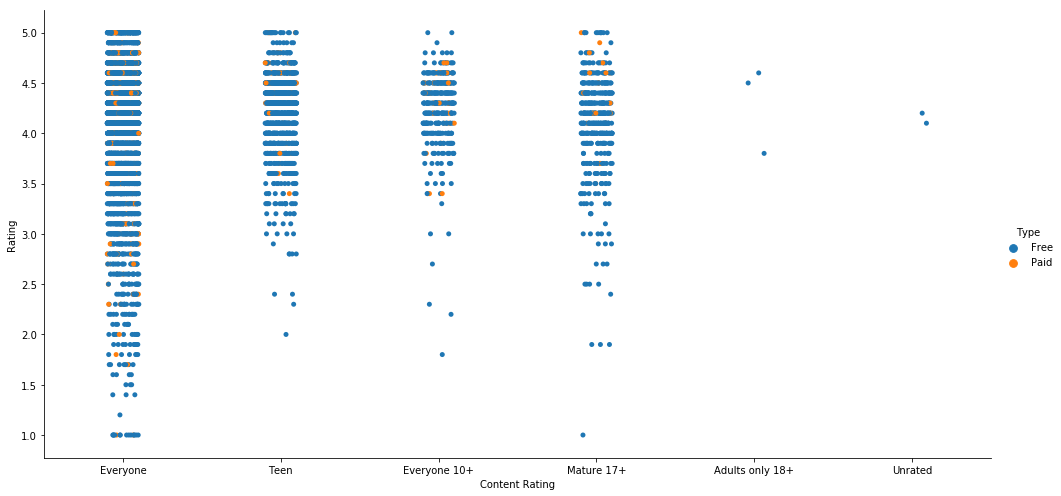

In [93]:
sns.catplot(x='Content Rating',y='Rating',hue='Type',aspect=2,height=7,data=x)

In [61]:
x

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
0,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0,Everyone,"June 20, 2018"
5,ART_AND_DESIGN,4.4,167.0,50000.0,Free,0,Everyone,"March 26, 2017"
6,ART_AND_DESIGN,3.8,178.0,50000.0,Free,0,Everyone,"April 26, 2018"
7,ART_AND_DESIGN,4.1,36815.0,1000000.0,Free,0,Everyone,"June 14, 2018"
8,ART_AND_DESIGN,4.4,13791.0,1000000.0,Free,0,Everyone,"September 20, 2017"
9,ART_AND_DESIGN,4.7,121.0,10000.0,Free,0,Everyone,"July 3, 2018"


In [191]:
x.drop([10472],inplace=True)

In [65]:
x['Installs'].describe()

count        9366
unique          6
top       1000000
freq         2329
Name: Installs, dtype: object

In [99]:
z = x['Installs']

In [100]:
x['Installs'] = ['1000' if x<10000 else '10000' if x<100000 else '100000' if x<1000000 else '1000000' if x<10000000 else '10000000' if x<100000000 else '1000000000' for x in z] 

In [84]:
len(str(100.0))

5

In [66]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 8 columns):
Category          9366 non-null object
Rating            9366 non-null float64
Reviews           9366 non-null float64
Installs          9366 non-null object
Type              9366 non-null object
Price             9366 non-null object
Content Rating    9366 non-null object
Last Updated      9366 non-null object
dtypes: float64(2), object(6)
memory usage: 978.5+ KB


In [67]:
x['Installs'].unique()

array(['10000', '100000', '1000000', '10000000', '1000', '1000000000'],
      dtype=object)

In [ ]:
x

In [94]:
x_cnt = pd.DataFrame(x.groupby('Category')['Type'].count()).sort_values(by='Type',ascending=False)
x_cnt.columns=['Count']

In [95]:
x_cnt

,Count
Category,
FAMILY,1971
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384


In [73]:
'Tools' in x_cnt['Count'].head(20).keys()

False

In [75]:
categ1 = x_cnt['Count'].keys()

In [76]:
#x['Genres'] = [x1 if x1 in genres else 'Others' for x1 in x['Genres']]
x

,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Last Updated
0,ART_AND_DESIGN,4.1,159.0,10000,Free,0,Everyone,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967.0,100000,Free,0,Everyone,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510.0,1000000,Free,0,Everyone,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644.0,10000000,Free,0,Teen,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967.0,100000,Free,0,Everyone,"June 20, 2018"
5,ART_AND_DESIGN,4.4,167.0,10000,Free,0,Everyone,"March 26, 2017"
6,ART_AND_DESIGN,3.8,178.0,10000,Free,0,Everyone,"April 26, 2018"
7,ART_AND_DESIGN,4.1,36815.0,1000000,Free,0,Everyone,"June 14, 2018"
8,ART_AND_DESIGN,4.4,13791.0,1000000,Free,0,Everyone,"September 20, 2017"
9,ART_AND_DESIGN,4.7,121.0,10000,Free,0,Everyone,"July 3, 2018"


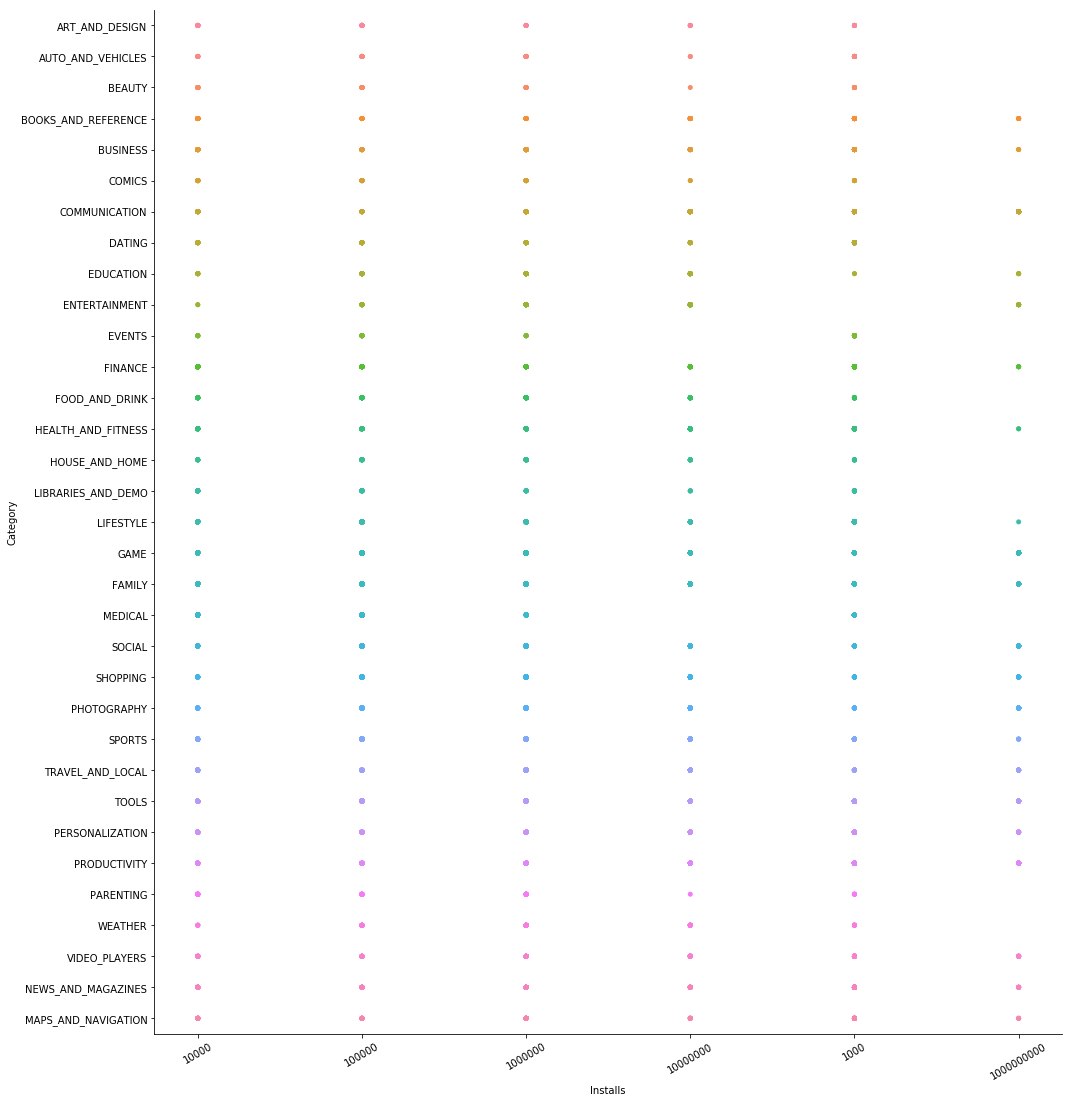

In [101]:
g = sns.catplot(y='Category', x= 'Installs',jitter=False,aspect=1,height=15, data=x)
g.set_xticklabels(rotation=30)

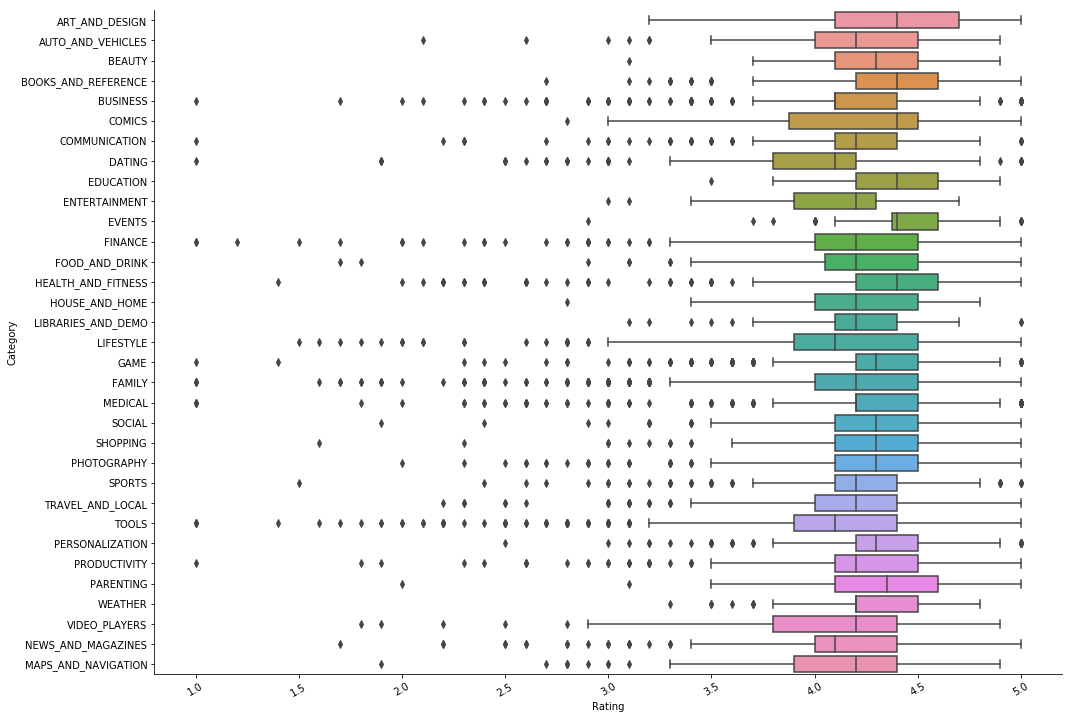

In [102]:
g = sns.catplot(y='Category', x= 'Rating',kind='box',aspect=1.5,height=10, data=x)
g.set_xticklabels(rotation=30)

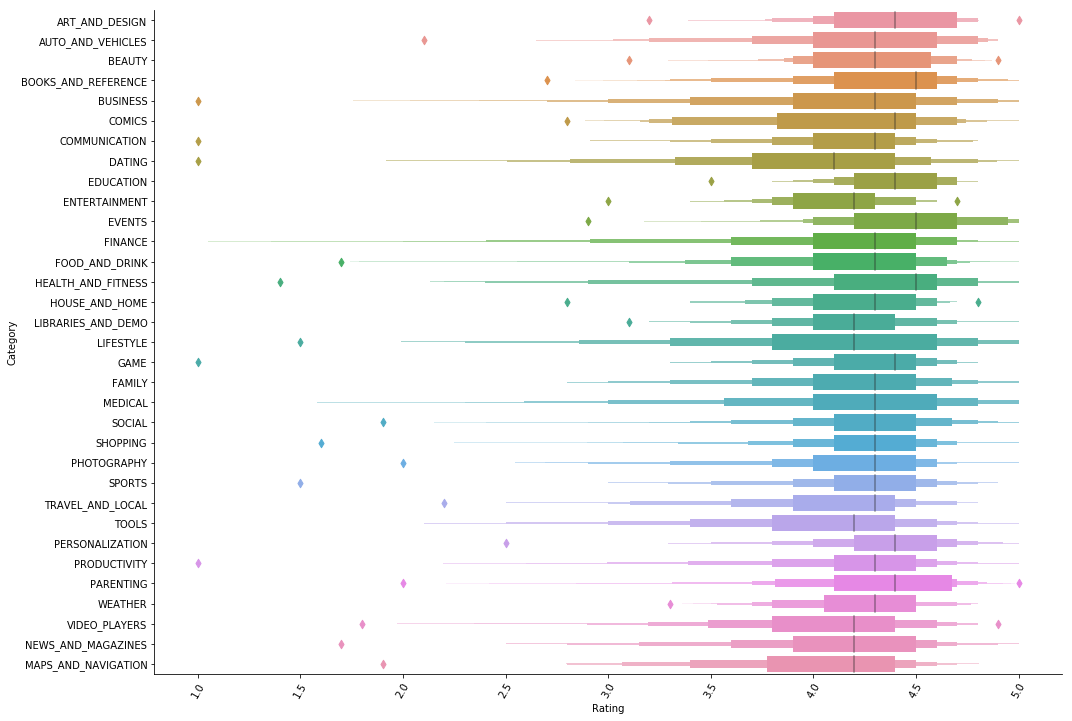

In [92]:
g = sns.catplot(y='Category', x= 'Rating',kind='boxen',aspect=1.5,height=10, data=x)
g.set_xticklabels(rotation=60)

C:\Users\Sohail\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


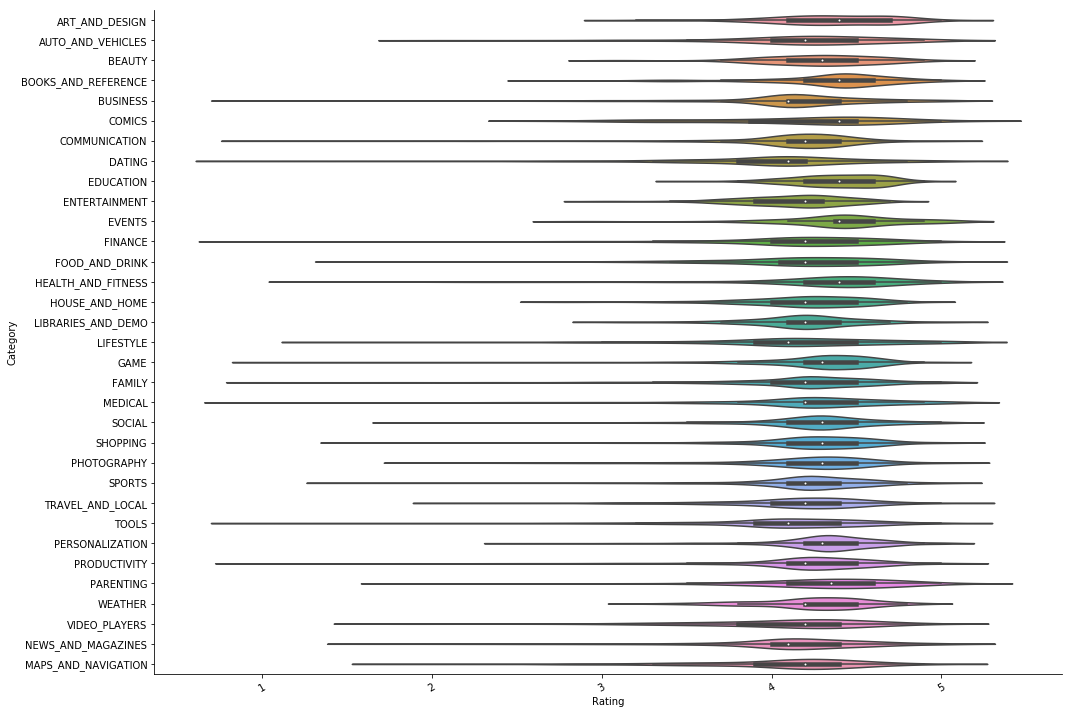

In [103]:
g = sns.catplot(y='Category', x= 'Rating',kind='violin',aspect=1.5,height=10, data=x)
g.set_xticklabels(rotation=30)

C:\Users\Sohail\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


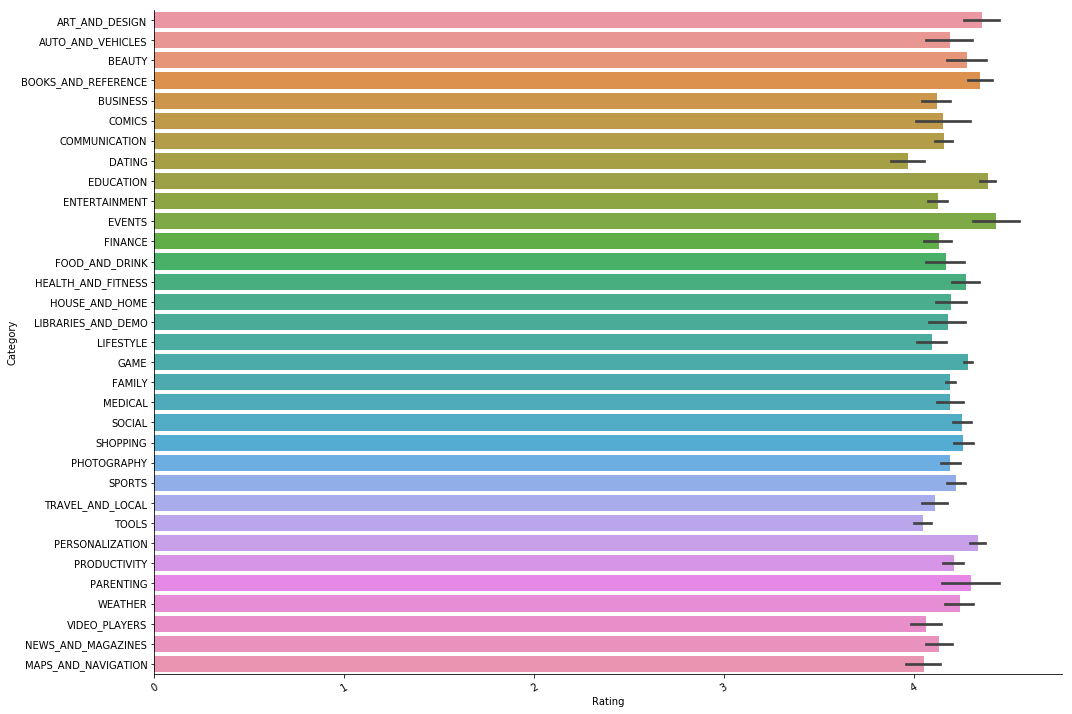

In [94]:
g = sns.catplot(y='Category', x= 'Rating',kind='bar',aspect=1.5,height=10, data=x)
g.set_xticklabels(rotation=30)

In [104]:
x['Age'] = (pd.to_datetime('2018-09-20')-pd.to_datetime(x['Last Updated'])).dt.days

In [105]:
x['Age']

0         256
1         248
2          50
3         104
4          92
5         543
6         147
7          98
8         365
9          79
10        328
11         51
12        171
13         86
14         48
15        106
16         51
17        317
18         48
19         52
20        153
21        184
22         70
23        197
24         75
25        148
26        344
27        183
28         70
29        394
         ... 
10811      58
10812      99
10813      65
10814    1205
10815      63
10816      45
10817    1056
10818     854
10819     411
10820      85
10821     114
10822     293
10823     151
10824      51
10825     230
10826     181
10827      99
10828     493
10829     823
10830    1704
10831      99
10832    1677
10833    1642
10834     459
10835     721
10836     422
10837      76
10838     608
10839    1340
10840      57
Name: Age, Length: 10840, dtype: int64

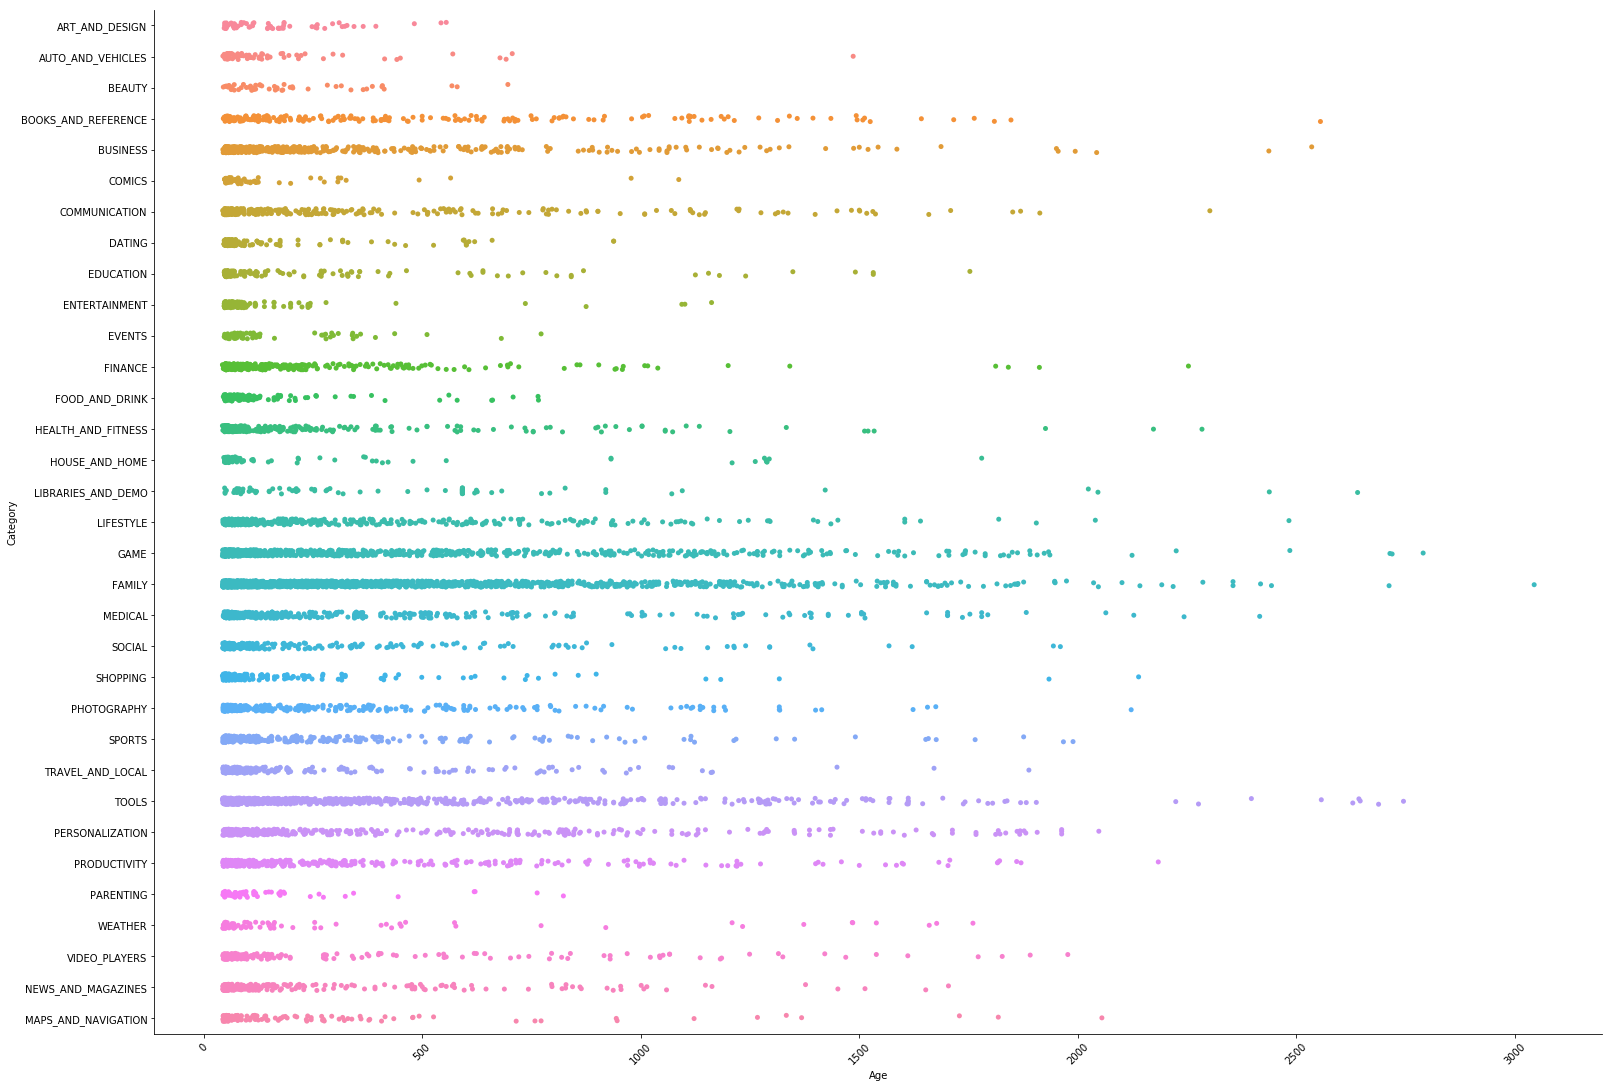

In [106]:
g =sns.catplot(y='Category',x='Age',aspect=1.5,height=15,data=x)
g.set_xticklabels(rotation =45)

In [145]:
x.groupby(['Installs'])['Rating'].std()

Installs
1000          0.599885
10000         0.568811
100000        0.471238
1000000       0.338925
10000000      0.268246
1000000000    0.174789
Name: Rating, dtype: float64